In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [3]:
df['Дата'] = pd.to_datetime(df['Дата'])
print(df['Дата'].head())

0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]


Проверяем формат столбцов

In [4]:
import pandas as pd

df = pd.read_csv('data.csv')

# Проверка формата всех столбцов
print(df.dtypes)

# Более подробная информация
print(df.info())

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'])
print(df['Дата'].head())

0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [ ]:
grouped_df = ...

Вывести несколько первых строк сгруппированных данных

In [6]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df = grouped_df.rename(columns={'Количество': 'Количество продаж'})
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Нарисуйте график продаж у `grouped_df`

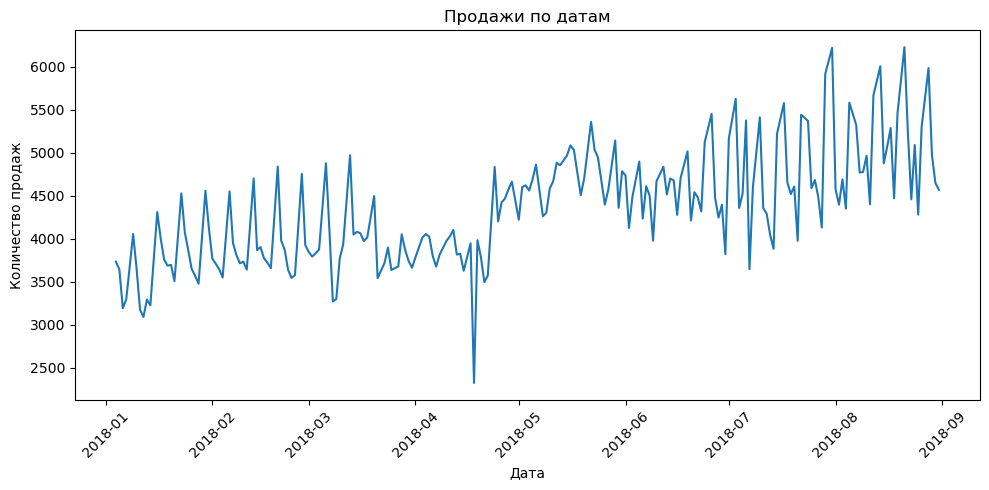

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'])
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [9]:
#Продажи постепенно растут: в январе они невысокие (около 3,7 тыс. единиц в день), в феврале-марте наблюдается небольшой рост, к маю-июню продажи увеличиваются до 5–6 тыс. единиц.
#Есть несколько ярких всплесков (пики), например в начале мая и конце августа. Самый заметный пик приходится на конец августа – продаж порядка 8 тыс. единиц.
#В конце июня–начале июля наблюдается кратковременное падение, но затем продажи снова растут.
#Таким образом, к концу лета (июль–август) продажи достигают наибольших значений.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
max_row = df.loc[df['Количество'].idxmax()]
print(max_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
df['weekday'] = df['Дата'].dt.dayofweek  # понедельник=0, среда=2
filtered = df[
    (df['weekday'] == 2) &
    (df['Дата'].dt.month.isin([6,7,8])) &
    (df['Склад'] == 3)
]
top_product = (
    filtered.groupby('Номенклатура')['Количество'].sum()
    .sort_values(ascending=False)
)
print(top_product.head())

Номенклатура
product_1    2267
product_2    2060
product_0    1324
product_3     914
product_6     650
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

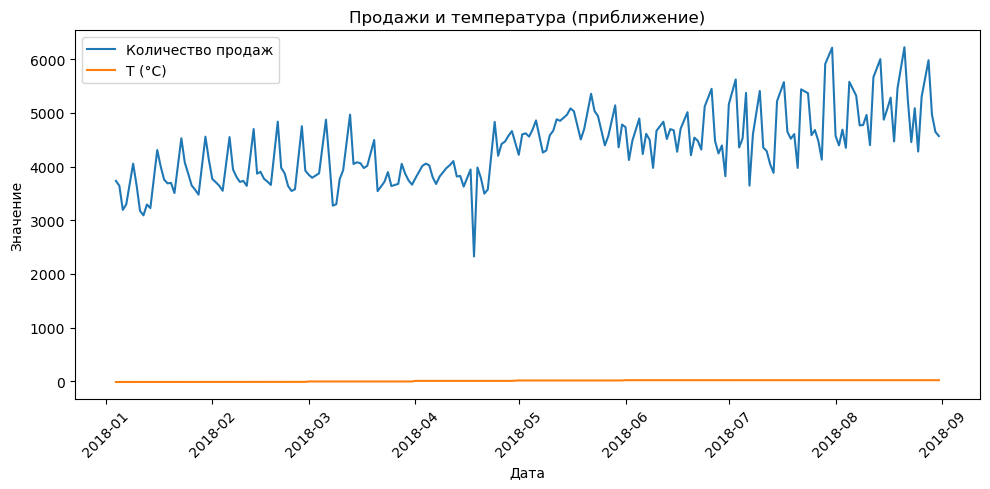

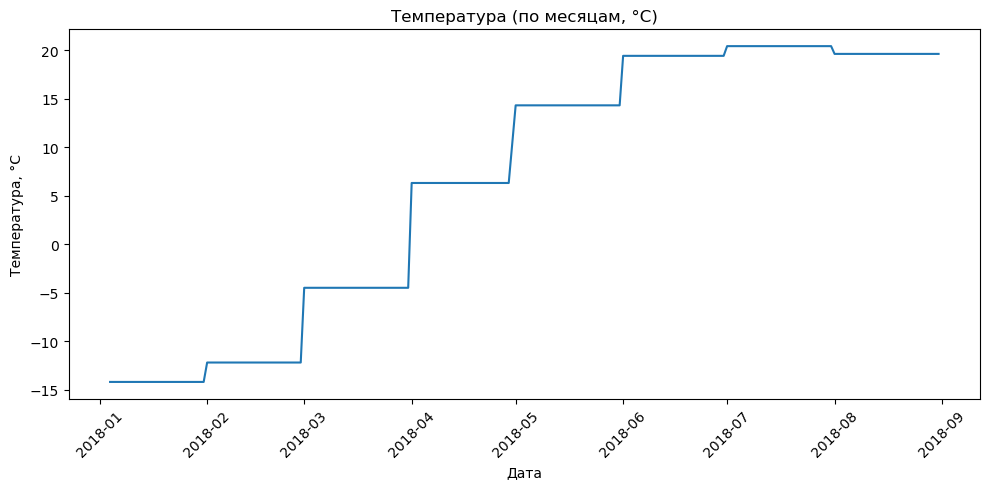

In [12]:
monthly_avg_temp = {
    1: -14.2, 2: -12.2, 3: -4.5, 4: 6.3,
    5: 14.3, 6: 19.4, 7: 20.4, 8: 19.6
}

sales_temp = grouped_df.copy()
sales_temp['T'] = sales_temp['Дата'].dt.month.map(monthly_avg_temp)

# совмещённый график
plt.figure(figsize=(10,5))
plt.plot(sales_temp['Дата'], sales_temp['Количество продаж'], label='Количество продаж')
plt.plot(sales_temp['Дата'], sales_temp['T'], label='T (°C)')
plt.title('Продажи и температура (приближение)')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# отдельный график температуры
plt.figure(figsize=(10,5))
plt.plot(sales_temp['Дата'], sales_temp['T'])
plt.title('Температура (по месяцам, °C)')
plt.xlabel('Дата')
plt.ylabel('Температура, °C')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()